In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import tarfile
import os

if not os.path.exists('/content/drive/My Drive/UFRGS/Learnability/relu'):
  with tarfile.open('/content/drive/My Drive/UFRGS/Learnability/neurons_relu.tar.gz', "r:gz") as nr:
    nr.extractall(path='/content/drive/My Drive/UFRGS/Learnability/relu')

if not os.path.exists('/content/drive/My Drive/UFRGS/Learnability/logistic'):
  with tarfile.open('/content/drive/My Drive/UFRGS/Learnability/neurons_logistic.tar.gz', "r:gz") as nr:
    nr.extractall(path='/content/drive/My Drive/UFRGS/Learnability/logistic')


In [11]:
# an example dataframe, note the repeated formulas
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/UFRGS/Learnability/relu/neurons_relu_v80_onphase_v80_c343_r4.287.csv')
df.head(8)

,formula,sampler,activation,#neurons,cvfolds,metric,mean,std,start,finish
0,sat_00432_k3_v80_c343.cnf_unigen_481_500.pkl.gz,unigen,relu,1,5,accuracy,0.902041,0.195918,2020-08-31 03:03:39.721621,2020-08-31 03:03:41.561511
1,sat_00432_k3_v80_c343.cnf_unigen_481_500.pkl.gz,unigen,relu,2,5,accuracy,0.988832,0.022335,2020-08-31 03:03:39.721621,2020-08-31 03:03:43.499602
2,sat_00432_k3_v80_c343.cnf_unigen_481_500.pkl.gz,unigen,relu,4,5,accuracy,1.000000,0.000000,2020-08-31 03:03:39.721621,2020-08-31 03:03:45.598222
3,sat_00130_k3_v80_c343.cnf_unigen_504_500.pkl.gz,unigen,relu,1,5,accuracy,0.796010,0.239708,2020-08-31 03:03:45.598636,2020-08-31 03:03:47.887674
4,sat_00130_k3_v80_c343.cnf_unigen_504_500.pkl.gz,unigen,relu,2,5,accuracy,0.991040,0.011078,2020-08-31 03:03:45.598636,2020-08-31 03:03:50.184656
5,sat_00130_k3_v80_c343.cnf_unigen_504_500.pkl.gz,unigen,relu,4,5,accuracy,0.996020,0.003723,2020-08-31 03:03:45.598636,2020-08-31 03:03:52.580310
6,sat_00130_k3_v80_c343.cnf_unigen_504_500.pkl.gz,unigen,relu,8,5,accuracy,0.999005,0.001990,2020-08-31 03:03:45.598636,2020-08-31 03:03:54.855951
7,sat_00130_k3_v80_c343.cnf_unigen_504_500.pkl.gz,unigen,relu,16,5,accuracy,0.997015,0.002437,2020-08-31 03:03:45.598636,2020-08-31 03:03:56.816746


In [7]:
# we'll consider only those sampled with unigen (because they have 40+ samples) 
print(f'Without filtering {len(df)}')
df = df[df.sampler == 'unigen']
print(f'With filtering {len(df)}')


Without filtering 2130
With filtering 2130


In [17]:
# then we get the maximum #neurons of each formula (no repeated formulas anymore)
# note that none of those with 512 neurons has perfect accuracy
grouped_df = df.groupby("formula", sort=False).last().reset_index()
print(len(grouped_df))
grouped_df.head(8)

483


,formula,sampler,activation,#neurons,cvfolds,metric,mean,std,start,finish
0,sat_00432_k3_v80_c343.cnf_unigen_481_500.pkl.gz,unigen,relu,4,5,accuracy,1.00000,0.00000,2020-08-31 03:03:39.721621,2020-08-31 03:03:45.598222
1,sat_00130_k3_v80_c343.cnf_unigen_504_500.pkl.gz,unigen,relu,64,5,accuracy,1.00000,0.00000,2020-08-31 03:03:45.598636,2020-08-31 03:04:00.260676
2,sat_00301_k3_v80_c343.cnf_unigen_412_500.pkl.gz,unigen,relu,4,5,accuracy,1.00000,0.00000,2020-08-31 03:04:00.261082,2020-08-31 03:04:05.940943
3,sat_00058_k3_v80_c343.cnf_Glucose3_16_500.pkl.gz,unigen,relu,32,5,accuracy,1.00000,0.00000,2020-08-31 03:04:05.941371,2020-08-31 03:04:13.217064
4,sat_00006_k3_v80_c343.cnf_unigen_365_500.pkl.gz,unigen,relu,4,5,accuracy,1.00000,0.00000,2020-08-31 03:04:13.217481,2020-08-31 03:04:18.478353
5,sat_00114_k3_v80_c343.cnf_unigen_501_500.pkl.gz,unigen,relu,8,5,accuracy,1.00000,0.00000,2020-08-31 03:04:18.479016,2020-08-31 03:04:27.016825
6,sat_00472_k3_v80_c343.cnf_Glucose3_2_500.pkl.gz,unigen,relu,512,5,accuracy,0.99604,0.00485,2020-08-31 03:04:27.017236,2020-08-31 03:04:39.025300
7,sat_00405_k3_v80_c343.cnf_unigen_437_500.pkl.gz,unigen,relu,8,5,accuracy,1.00000,0.00000,2020-08-31 03:04:39.025730,2020-08-31 03:04:45.895656


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
grouped_df = df.groupby("formula", sort=False).last().reset_index()
m_grouped = len(grouped_df)
out = grouped_df.groupby('#neurons').apply(len)/m_grouped
out
grouped_df.shape[0]
# sns.lineplot(x='#neurons', data=out)

grouped_df['#neurons'].value_counts(sort=False) / grouped_df.shape[0]

512    0.099379
1      0.006211
2      0.105590
4      0.314700
8      0.275362
16     0.095238
32     0.068323
64     0.020704
128    0.008282
256    0.006211
Name: #neurons, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


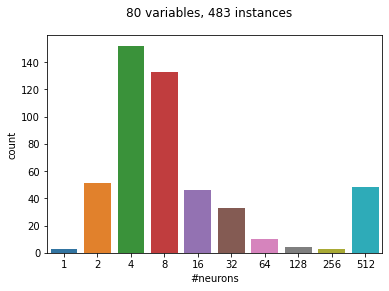

In [13]:
# now, I'll plot a count of how many formulas were mastered with each number of neurons
plt.figure()
sns.countplot(x="#neurons", data=grouped_df) #kudos: https://stackoverflow.com/a/58021306/1251716
plt.suptitle(f'80 variables, {len(grouped_df)} instances')
pass # holds the output of suptitle

## The problem is with multiple plots
Each will have a different number of instances (see code below), hence different y scales. I want the y axis in %

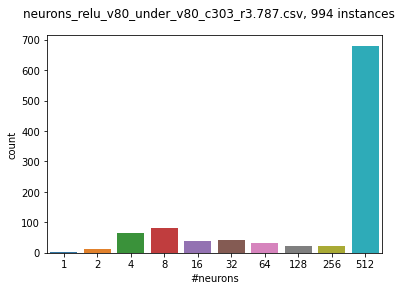

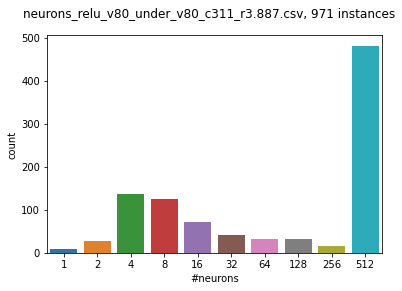

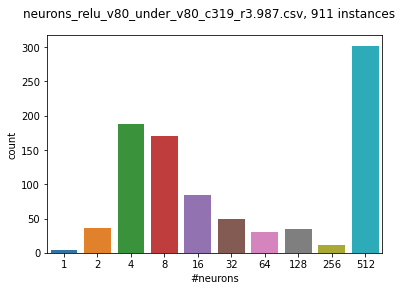

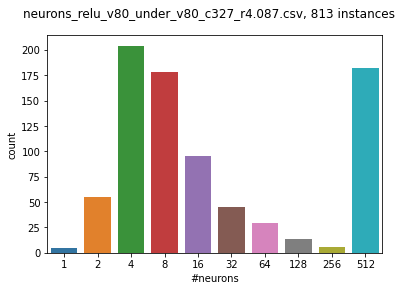

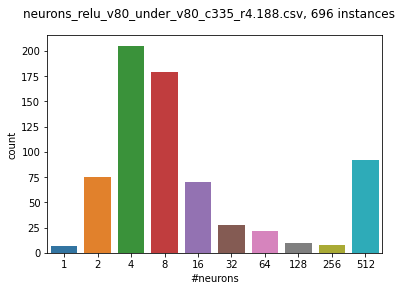

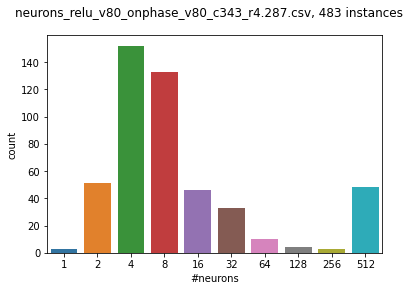

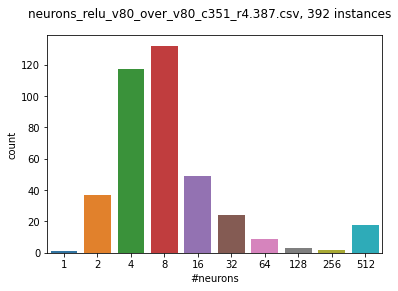

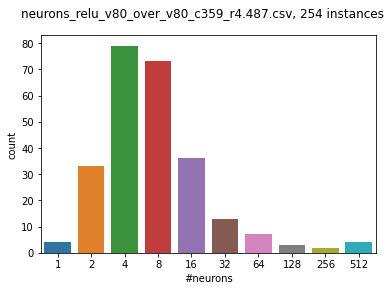

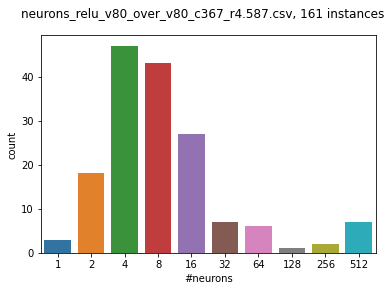

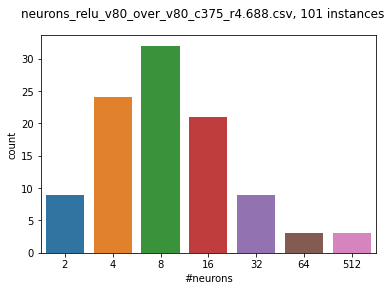

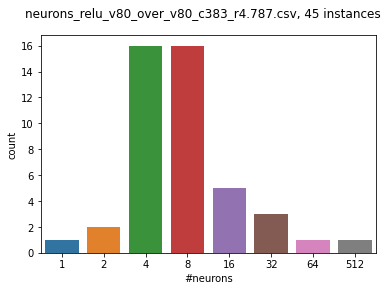

In [16]:
import re
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def dir_string_ratio(dir_str):
    """
    Extracts the ratio on a directory string.
    Useful for sorting in increasing difficulty
    """
    pattern = re.compile(r"r(\d\.\d+)\.csv")
    return float(pattern.search(dir_str).group(1))

def plot_num_neurons(basedir, num_vars, activation):

    for f in sorted(glob(f'{basedir}/neurons_{activation}_v{num_vars}_*.csv'), key=dir_string_ratio):
        df = pd.read_csv(f)
        df = df[df.sampler == 'unigen']  # gets only instances with 40+ solutions
        grouped_df = df.groupby("formula").last().reset_index()
        plt.figure()
        sns.countplot(x="#neurons", data=grouped_df) #kudos: https://stackoverflow.com/a/58021306/1251716
        plt.suptitle(f'{os.path.basename(f)}, {len(grouped_df)} instances')
        #plt.show()
        #plt.savefig(f'/tmp/{g}_freq.pdf')

plot_num_neurons('/content/drive/My Drive/UFRGS/Learnability/relu/', 80, 'relu')